In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import csv



In [2]:
# Pull Data

income = pd.read_csv("Census_Household_Income_Block_Groups.csv")
income_df = pd.DataFrame(income)       
        
income_df

commuter = pd.read_csv("Census_Commuting_Block_Groups.csv")
commuter_df = pd.DataFrame(commuter)
    
charlotte_df = pd.merge(income_df, commuter_df, how="left", on=["GEOID10"])
charlotte_df=charlotte_df.set_index(charlotte_df["GEOID10"])
#charlotte_df.head()

del charlotte_df['OBJECTID_x']
del charlotte_df['OBJECTID_y']
del charlotte_df['STATEFP10_x']
del charlotte_df['STATEFP10_y']
del charlotte_df['COUNTYFP10_x']
del charlotte_df['COUNTYFP10_y']
del charlotte_df['TRACTCE10_x']
del charlotte_df['TRACTCE10_y']
del charlotte_df['BLKGRPCE10_x']
del charlotte_df['BLKGRPCE10_y']
del charlotte_df['GEOID10']
del charlotte_df['NAMELSAD10_x']
del charlotte_df['NAMELSAD10_y']
del charlotte_df['LOGRECNO_x']
del charlotte_df['LOGRECNO_y']
del charlotte_df['geoname_x']
del charlotte_df['geoname_y']
del charlotte_df['SHAPESTArea_y']
del charlotte_df['SHAPESTArea_x']
del charlotte_df['SHAPESTLength_y']
del charlotte_df['SHAPESTLength_x']

charlotte_df.head()

,Total_Households,Less_than_10000,i10000_to_14999,i15000_to19999,i20000_to_24999,i25000_to_29999,i30000_to_34999,i35000_to_39999,i40000_to_44999,i45000_to_49999,...,FamiliesInPoverty,FamilyPovertyRate,Workers_16_and_older,Drove_alone,Carpool,Public_Transportation,Walked,Other_Means,Non_SOV_Commuters,Pct_Non_SOV_Commuters
GEOID10,,,,,,,,,,,,,,,,,,,,,
371190016092,982,110,39,49,105,75,43,42,20,68,...,105,0.202703,1147,846,476,23,14,26,539,0.469922
371190031091,1088,38,35,78,120,105,102,67,76,57,...,109,0.189565,1568,1062,516,192,34,22,764,0.487245
371190064052,943,20,46,59,11,11,30,66,26,21,...,0,0.000000,892,794,150,7,11,5,173,0.193946
371190027021,803,13,13,0,37,12,65,0,10,18,...,13,0.023593,950,806,60,42,72,0,174,0.183158
371190030131,1124,49,15,0,23,0,15,61,71,43,...,56,0.066116,1211,944,534,0,0,0,534,0.440958


In [3]:
# Combine income groups
#0-50k
less_10k = charlotte_df["Less_than_10000"].values
tenk_fift = charlotte_df["i10000_to_14999"].values
fift_ninet = charlotte_df["i15000_to19999"].values
twenty_twenty5=charlotte_df["i20000_to_24999"].values
twenty5_thirty=charlotte_df["i25000_to_29999"].values
thirty_thirty5=charlotte_df["i30000_to_34999"].values
thirty5_forty=charlotte_df["i35000_to_39999"].values
forty_forty5=charlotte_df["i40000_to_44999"].values
forty5_fifty=charlotte_df["i45000_to_49999"].values

zero_fifty=less_10k+tenk_fift+fift_ninet+twenty_twenty5+twenty5_thirty+thirty_thirty5+thirty5_forty+forty_forty5+forty5_fifty

#50k-100k
fifty_sixty=charlotte_df["i50000_to_59999"].values
sixty_seventy5=charlotte_df["i60000_to_74999"].values
seventy5_onehund=charlotte_df["i75000_to_99999"].values

fifty_onehund=fifty_sixty+sixty_seventy5+seventy5_onehund

#100k-150k
onehund_one25=charlotte_df["i100000_to_124999"].values
one25_one50=charlotte_df["i125000_to_149999"].values
one50_two=charlotte_df["i150000_to_199999"].values

onehund_two=onehund_one25+one25_one50+one50_two


#zero_fifty
#fifty_onehund
#onehund_two



In [4]:
# Create new DataFrame
del charlotte_df['Less_than_10000']
del charlotte_df['i10000_to_14999']
del charlotte_df['i15000_to19999']
del charlotte_df['i20000_to_24999']
del charlotte_df['i25000_to_29999']
del charlotte_df['i30000_to_34999']
del charlotte_df['i35000_to_39999']
del charlotte_df['i40000_to_44999']
del charlotte_df['i45000_to_49999']
del charlotte_df['i50000_to_59999']
del charlotte_df['i60000_to_74999']
del charlotte_df['i75000_to_99999']
del charlotte_df['i100000_to_124999']
del charlotte_df['i125000_to_149999']
del charlotte_df['i150000_to_199999']

charlotte_df["0-50k"]=zero_fifty
charlotte_df["50k-100k"]=fifty_onehund
charlotte_df["100k-200k"]=onehund_two


clean_charlotte=charlotte_df[["0-50k", "50k-100k", "100k-200k", "i200000_or_more", "Median_Household_Income",
                "FamiliesInPoverty", "FamilyPovertyRate", "TotalFamilies", "Total_Households",
                "Workers_16_and_older", "Drove_alone", "Carpool", "Public_Transportation",
                "Walked", "Other_Means", "Non_SOV_Commuters", "Pct_Non_SOV_Commuters"]]

clean_charlotte.head()


,0-50k,50k-100k,100k-200k,i200000_or_more,Median_Household_Income,FamiliesInPoverty,FamilyPovertyRate,TotalFamilies,Total_Households,Workers_16_and_older,Drove_alone,Carpool,Public_Transportation,Walked,Other_Means,Non_SOV_Commuters,Pct_Non_SOV_Commuters
GEOID10,,,,,,,,,,,,,,,,,
371190016092,551,322,109,0,45526.0,105,0.202703,518,982,1147,846,476,23,14,26,539,0.469922
371190031091,678,357,43,10,39924.0,109,0.189565,575,1088,1568,1062,516,192,34,22,764,0.487245
371190064052,290,226,282,145,86250.0,0,0.000000,483,943,892,794,150,7,11,5,173,0.193946
371190027021,168,152,174,309,136995.0,13,0.023593,551,803,950,806,60,42,72,0,174,0.183158
371190030131,277,138,335,374,134286.0,56,0.066116,847,1124,1211,944,534,0,0,0,534,0.440958


Text(0.5, 1.0, 'Median Household Income vs Families in Poverty')

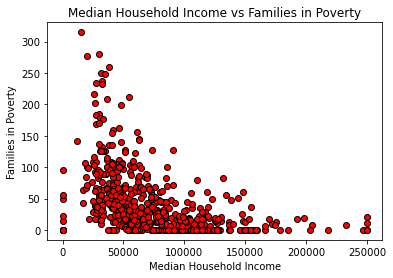

In [5]:
#TEST
x_axis=clean_charlotte["Median_Household_Income"]
y_axis=clean_charlotte["FamiliesInPoverty"]

plt.scatter(x_axis,y_axis, color="black", facecolor="red")
plt.xlabel("Median Household Income")
plt.ylabel("Families in Poverty")
plt.title("Median Household Income vs Families in Poverty")

In [6]:
#pie_numbers=clean_charlotte[["Walked","0-50k"]]

#pie_numbers1=pie_numbers["Walked"]

#y_axis1=clean_charlotte["Walked"]

#plt.pie(pie_numbers1, autopct="%1.1f%%", shadow=True, startangle=90)
#plt.xlabel("0-50k Income")
#plt.ylabel("Commuters Walking")

In [7]:
median_income=clean_charlotte["Median_Household_Income"].sort_values(ascending=False)

median_income.head(10)






GEOID10
371190028001    250000.0
371190029032    250000.0
371190028002    250000.0
371190030075    250000.0
371190029051    247159.0
371190058282    232500.0
371190029052    218333.0
371190064042    204884.0
371190028003    203036.0
371190058462    198214.0
Name: Median_Household_Income, dtype: float64

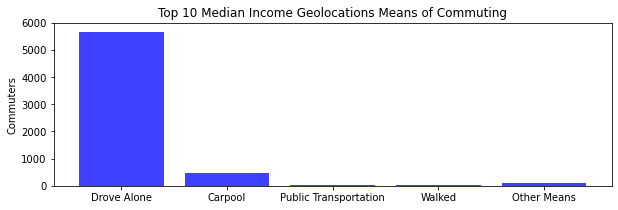

In [8]:
transport1=clean_charlotte.loc[371190028001]
transport2=clean_charlotte.loc[371190029032]
transport3=clean_charlotte.loc[371190028002]
transport4=clean_charlotte.loc[371190030075]
transport5=clean_charlotte.loc[371190029051]
transport6=clean_charlotte.loc[371190058282]
transport7=clean_charlotte.loc[371190029052]
transport8=clean_charlotte.loc[371190064042]
transport9=clean_charlotte.loc[371190028003]
transport0=clean_charlotte.loc[371190058462]


drove_alone=[]
carpool=[]
public=[]
walked=[]
other=[]


#transport1
drove_alone.append(transport1["Drove_alone"])
carpool.append(transport1["Carpool"])
public.append(transport1["Public_Transportation"])
walked.append(transport1["Walked"])
other.append(transport1["Other_Means"])

#transport2
drove_alone.append(transport2["Drove_alone"])
carpool.append(transport2["Carpool"])
public.append(transport2["Public_Transportation"])
walked.append(transport2["Walked"])
other.append(transport2["Other_Means"])

#transport3
drove_alone.append(transport3["Drove_alone"])
carpool.append(transport3["Carpool"])
public.append(transport3["Public_Transportation"])
walked.append(transport3["Walked"])
other.append(transport3["Other_Means"])

#transport4
drove_alone.append(transport4["Drove_alone"])
carpool.append(transport4["Carpool"])
public.append(transport4["Public_Transportation"])
walked.append(transport4["Walked"])
other.append(transport4["Other_Means"])

#transport5
drove_alone.append(transport5["Drove_alone"])
carpool.append(transport5["Carpool"])
public.append(transport5["Public_Transportation"])
walked.append(transport5["Walked"])
other.append(transport5["Other_Means"])

#transport6
drove_alone.append(transport6["Drove_alone"])
carpool.append(transport6["Carpool"])
public.append(transport6["Public_Transportation"])
walked.append(transport6["Walked"])
other.append(transport6["Other_Means"])

#transport7
drove_alone.append(transport7["Drove_alone"])
carpool.append(transport7["Carpool"])
public.append(transport7["Public_Transportation"])
walked.append(transport7["Walked"])
other.append(transport7["Other_Means"])

#transport8
drove_alone.append(transport8["Drove_alone"])
carpool.append(transport8["Carpool"])
public.append(transport8["Public_Transportation"])
walked.append(transport8["Walked"])
other.append(transport8["Other_Means"])

#transport9
drove_alone.append(transport9["Drove_alone"])
carpool.append(transport9["Carpool"])
public.append(transport9["Public_Transportation"])
walked.append(transport9["Walked"])
other.append(transport9["Other_Means"])

#transport0
drove_alone.append(transport0["Drove_alone"])
carpool.append(transport0["Carpool"])
public.append(transport0["Public_Transportation"])
walked.append(transport0["Walked"])
other.append(transport0["Other_Means"])

#drove_alone

labels =["Drove Alone", "Carpool", "Public Transportation", "Walked", "Other Means"]

y_axis=[sum(drove_alone),sum(carpool),sum(public),sum(walked),sum(other)]

x_axis=len(y_axis)

#x_axis

#y_axis

plt.figure(figsize=(10,3))
plt.bar(labels, y_axis, color='b', alpha=.75, align="center")
#plt.xlabel("Means of Transportation")
plt.ylabel ("Commuters")
plt.ylim(0,6000)
plt.title("Top 10 Median Income Geolocations Means of Commuting")

plt.savefig("output/Top10_bar.png")




In [9]:
median_income.tail(22)

GEOID10
371190041004    20446.0
371190020035    19943.0
371190037002    19872.0
371190045001    19189.0
371190056053    19091.0
371190048001    18828.0
371190052002    17097.0
371190056091    17079.0
371190023002    15490.0
371190039031    11881.0
371199803001        0.0
371190039023        0.0
371190056042        0.0
371190031033        0.0
371190056043        0.0
371190043021        0.0
371190001004        0.0
371199801001        0.0
371190036004        0.0
371199802001        0.0
371190038023        0.0
371190057111        NaN
Name: Median_Household_Income, dtype: float64

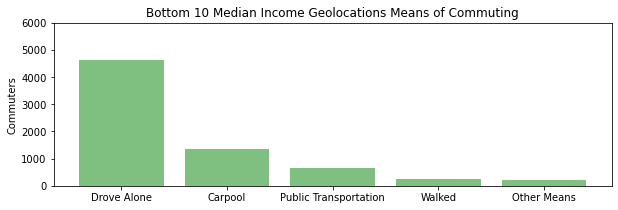

In [10]:
transport11=clean_charlotte.loc[371190041004]
transport12=clean_charlotte.loc[371190020035]
transport13=clean_charlotte.loc[371190037002]
transport14=clean_charlotte.loc[371190045001]
transport15=clean_charlotte.loc[371190056053]
transport16=clean_charlotte.loc[371190048001]
transport17=clean_charlotte.loc[371190052002]
transport18=clean_charlotte.loc[371190056091]
transport19=clean_charlotte.loc[371190023002]
transport20=clean_charlotte.loc[371190039031]


drove_alone1=[]
carpool1=[]
public1=[]
walked1=[]
other1=[]


#transport11
drove_alone1.append(transport11["Drove_alone"])
carpool1.append(transport11["Carpool"])
public1.append(transport11["Public_Transportation"])
walked1.append(transport11["Walked"])
other1.append(transport11["Other_Means"])

#transport12
drove_alone1.append(transport12["Drove_alone"])
carpool1.append(transport12["Carpool"])
public1.append(transport12["Public_Transportation"])
walked1.append(transport12["Walked"])
other1.append(transport12["Other_Means"])

#transport13
drove_alone1.append(transport13["Drove_alone"])
carpool1.append(transport13["Carpool"])
public1.append(transport13["Public_Transportation"])
walked1.append(transport13["Walked"])
other1.append(transport13["Other_Means"])

#transport14
drove_alone1.append(transport14["Drove_alone"])
carpool1.append(transport14["Carpool"])
public1.append(transport14["Public_Transportation"])
walked1.append(transport14["Walked"])
other1.append(transport14["Other_Means"])

#transport15
drove_alone1.append(transport15["Drove_alone"])
carpool1.append(transport15["Carpool"])
public1.append(transport15["Public_Transportation"])
walked1.append(transport15["Walked"])
other1.append(transport15["Other_Means"])

#transport16
drove_alone1.append(transport16["Drove_alone"])
carpool1.append(transport16["Carpool"])
public1.append(transport16["Public_Transportation"])
walked1.append(transport16["Walked"])
other1.append(transport16["Other_Means"])

#transport17
drove_alone1.append(transport17["Drove_alone"])
carpool1.append(transport17["Carpool"])
public1.append(transport17["Public_Transportation"])
walked1.append(transport17["Walked"])
other1.append(transport17["Other_Means"])

#transport18
drove_alone1.append(transport18["Drove_alone"])
carpool1.append(transport18["Carpool"])
public1.append(transport18["Public_Transportation"])
walked1.append(transport18["Walked"])
other1.append(transport18["Other_Means"])

#transport19
drove_alone1.append(transport19["Drove_alone"])
carpool1.append(transport19["Carpool"])
public1.append(transport19["Public_Transportation"])
walked1.append(transport19["Walked"])
other1.append(transport19["Other_Means"])

#transport20
drove_alone1.append(transport20["Drove_alone"])
carpool1.append(transport20["Carpool"])
public1.append(transport20["Public_Transportation"])
walked1.append(transport20["Walked"])
other1.append(transport20["Other_Means"])

#drove_alone


y_axis1=[sum(drove_alone1),sum(carpool1),sum(public1),sum(walked1),sum(other1)]

#x_axis

labels =["Drove Alone", "Carpool", "Public Transportation", "Walked", "Other Means"]



plt.figure(figsize=(10,3))
plt.bar(labels, y_axis1, color='g', alpha=.5, align="center")
plt.ylabel ("Commuters")
plt.ylim(0,6000)
plt.title("Bottom 10 Median Income Geolocations Means of Commuting")

plt.savefig("output/Bottom10_bar.png")

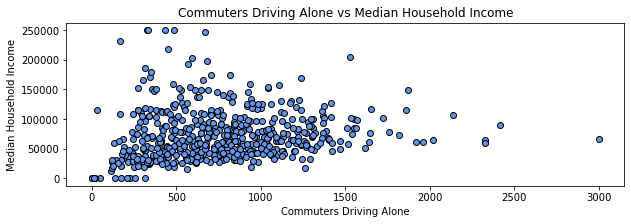

In [11]:
driving=clean_charlotte[["Drove_alone", "Median_Household_Income"]]


driving_x_axis=driving["Drove_alone"]
driving_y_axis=driving["Median_Household_Income"]

plt.figure(figsize=(10,3))
plt.scatter(driving_x_axis, driving_y_axis, color="black", facecolor="cornflowerblue")
plt.xlabel("Commuters Driving Alone")
plt.ylabel("Median Household Income")
plt.title("Commuters Driving Alone vs Median Household Income")

plt.savefig("output/Driving_Alone_scatter.png")




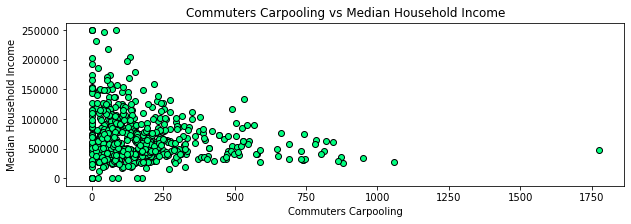

In [12]:
multiple=clean_charlotte[["Carpool","Median_Household_Income"]]


carpool_x_axis=multiple["Carpool"]
carpool_y_axis=multiple["Median_Household_Income"]

plt.figure(figsize=(10,3))
plt.scatter(carpool_x_axis, carpool_y_axis, color="black", facecolor="springgreen")
plt.xlabel("Commuters Carpooling")
plt.ylabel("Median Household Income")
plt.title("Commuters Carpooling vs Median Household Income")

plt.savefig("output/Carpool_scatter.png")

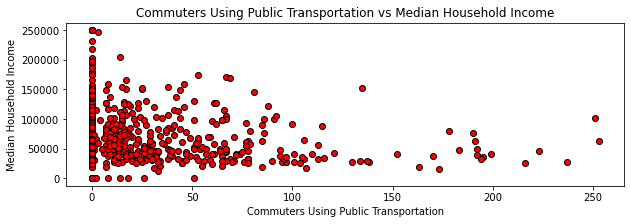

In [13]:
public_transpo=clean_charlotte[["Public_Transportation","Median_Household_Income"]]


public_transpo_x_axis=public_transpo["Public_Transportation"]
public_transpo_y_axis=public_transpo["Median_Household_Income"]

plt.figure(figsize=(10,3))
plt.scatter(public_transpo_x_axis, public_transpo_y_axis, color="black", facecolor="red")
plt.xlabel("Commuters Using Public Transportation")
plt.ylabel("Median Household Income")
plt.title("Commuters Using Public Transportation vs Median Household Income")

plt.savefig("output/Public_transportation_scatter.png")


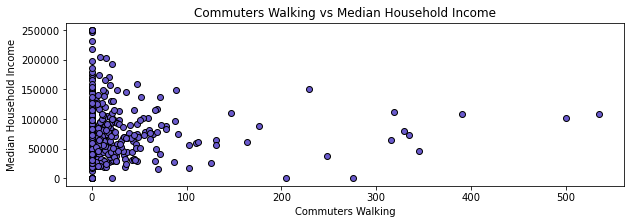

In [14]:
walking=clean_charlotte[["Walked","Median_Household_Income"]]


walking_x_axis=walking["Walked"]
walking_y_axis=public_transpo["Median_Household_Income"]

plt.figure(figsize=(10,3))
plt.scatter(walking_x_axis, walking_y_axis, color="black", facecolor="slateblue")
plt.xlabel("Commuters Walking")
plt.ylabel("Median Household Income")
plt.title("Commuters Walking vs Median Household Income")

plt.savefig("output/Walking_scatter.png")

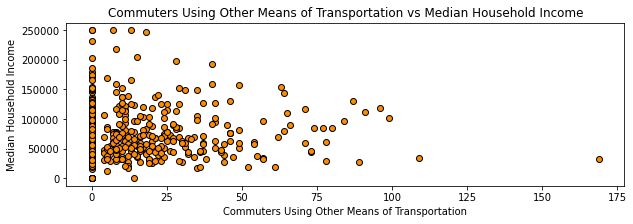

In [15]:
other_means=clean_charlotte[["Other_Means","Median_Household_Income"]]

other_means_x_axis=other_means["Other_Means"]
other_means_y_axis=public_transpo["Median_Household_Income"]

plt.figure(figsize=(10,3))
plt.scatter(other_means_x_axis, other_means_y_axis, color="black", facecolor="darkorange")
plt.xlabel("Commuters Using Other Means of Transportation")
plt.ylabel("Median Household Income")
plt.title("Commuters Using Other Means of Transportation vs Median Household Income")

plt.savefig("output/Other_scatter.png")

([<matplotlib.patches.Wedge at 0x7fc4a63347b8>,
 [Text(-0.8614754928088881, -0.905737255107508, 'Drove Alone'),
  Text(1.099826517607096, 0.7828675693680561, 'Carpool'),
  Text(0.3869940153275956, 1.2933428130625788, 'Public Transportation'),
  Text(0.18558371477292152, 1.3371831156618317, 'Walked'),
  Text(0.05263116463432234, 1.3489736693165046, 'Other')],
 [Text(-0.5168852956853329, -0.5434423530645047, '75.8%'),
  Text(0.6924833629378011, 0.4929166177502575, '18.1%'),
  Text(0.24366289853959716, 0.8143269563727349, '3.0%'),
  Text(0.1168490055977654, 0.8419301098611531, '1.9%'),
  Text(0.03313814069568444, 0.8493537917918733, '1.2%')])

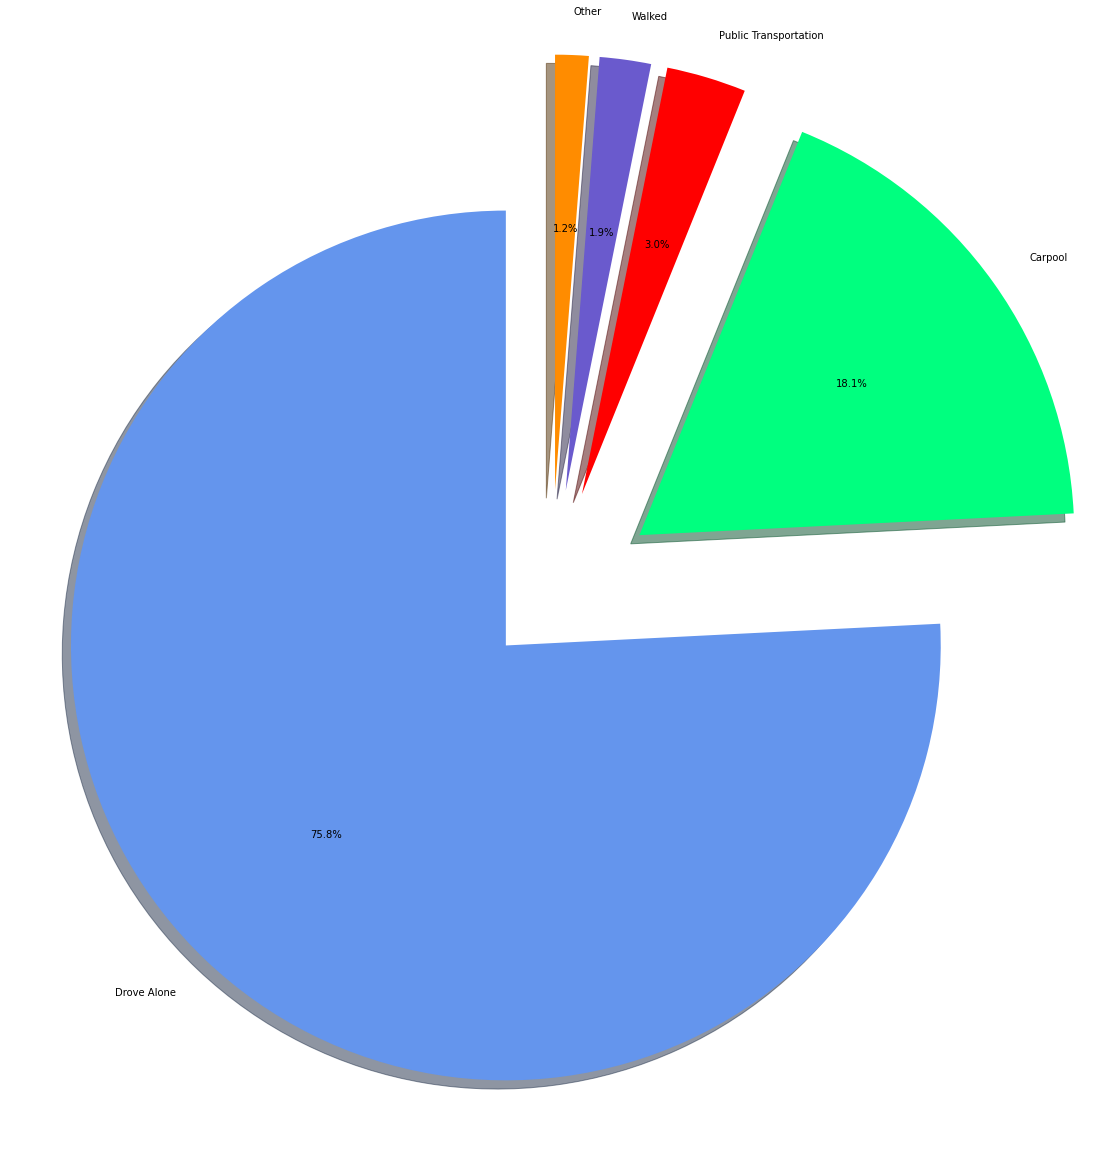

In [16]:
driving_pie=clean_charlotte["Drove_alone"].sum()
carpool_pie=clean_charlotte["Carpool"].sum()
public_pie=clean_charlotte["Public_Transportation"].sum()
walking_pie=clean_charlotte["Walked"].sum()
other_pie=clean_charlotte["Other_Means"].sum()

transpo=[driving_pie, carpool_pie, public_pie, walking_pie, other_pie]
labels=["Drove Alone", "Carpool", "Public Transportation", "Walked", "Other"]

colors = ["cornflowerblue", "springgreen", "red", "slateblue", "darkorange"]
explode = (0.15, 0.25, 0.25, 0.25, 0.25)

#plt.title("NYC Gym Popularity")
plt.figure(figsize=(20,20))
plt.pie(transpo, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

#plt.savefig("output/pie_chart.png")

